In [55]:
import torch
from   torch import optim
import torchvision.datasets   as datasets
import torchvision.transforms as transforms
import torchvision.utils      as vutils
from   torch.utils.data import DataLoader

import matplotlib.pyplot      as plt
import numpy                  as np

from   model import Generator
from   model import Critic
from   tqdm  import tqdm
from   math  import log2

from   IPython.display import clear_output

In [56]:
DATA_DIR        = "../data/flikr_hq/"
GEN_CHECKPOINT  = "gen.pth"
CRIT_CHECKPOINT = "crit.pth"
DEVICE          = "cuda"
SAVE_MODEL      = True
LOAD_MODEL      = False
START_IMG_SIZE  = 8
LEARNING_RATE   = 1e-3
BATCH_SIZES     = [512, 256, 128, 64, 64, 32]
IMG_CHANNELS    = 3
Z_DIM           = 512
IN_CHANNELS     = 512
LAMBDA_GP       = 10
PROG_EPOCHS     = [24] * len(BATCH_SIZES)
NUM_WORKERS     = 24
MAX_GRAD_NORM   = 1.0

torch.backends.cudnn.benchmarks = True

In [57]:
def gradient_penalty(critic, real, fake, alpha, train_step, device):
    batch_size, img_channels, h, w = real.shape
    beta = torch.rand((batch_size, 1, 1, 1)).repeat(1, img_channels, h, w).to(device)
    mixed_imgs = real * beta + fake.detach() * (1 - beta)
    mixed_imgs.requires_grad_(True)
    mixed_scores = critic(mixed_imgs, alpha, train_step)

    gradient = torch.autograd.grad(
        inputs=mixed_imgs,
        outputs=mixed_scores,
        grad_outputs=torch.ones_like(mixed_scores),
        create_graph=True,
        retain_graph=True
    )[0]

    gradient = gradient.view(gradient.shape[0], -1)
    gradient_norm = gradient.norm(2, dim=1)
    penalty = torch.mean((gradient_norm - 1) ** 2)
    
    return penalty


In [58]:
def save_checkpoint(model, optim, filename="progan_ckpnt.pth"):
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optim.state_dict()
    }
    torch.save(checkpoint, filename)


def load_checkpoint(filename, model, optim, lr):
    checkpoint = torch.load(filename, map_location="cuda")
    model.load_state_dict(checkpoint["state_dict"])
    optim.load_state_dict(checkpoint["optimizer"])

    for group in optim.param_groups:
        group["lr"] = lr

In [59]:
def get_loader(img_size):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Normalize(
            [0.5 for _ in range(IMG_CHANNELS)],
            [0.5 for _ in range(IMG_CHANNELS)]
        )
    ])

    dataset = datasets.ImageFolder(root=DATA_DIR, transform=transform)
    loader = DataLoader(dataset, batch_size=BATCH_SIZES[int(log2(img_size/4))], shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)

    return loader, dataset


Image size: 128
Epoch [1/24]


100%|██████████| 2188/2188 [26:42<00:00,  1.37it/s, alpha=0.0833, crit_loss=-0.302, gen_loss=10.8, gp=0.0107]   


### Saving checkpoints ###


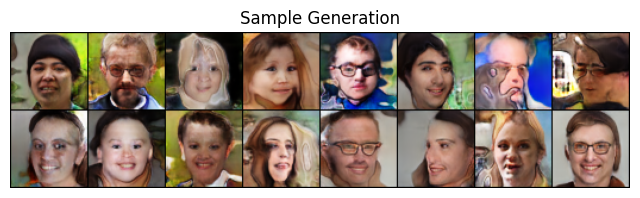

Epoch [2/24]


100%|██████████| 2188/2188 [27:36<00:00,  1.32it/s, alpha=0.167, crit_loss=-1.08, gen_loss=-1.35, gp=0.00161]  


### Saving checkpoints ###


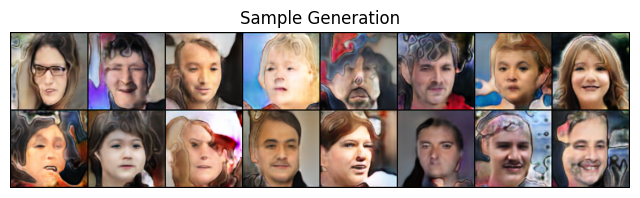

Epoch [3/24]


100%|██████████| 2188/2188 [27:24<00:00,  1.33it/s, alpha=0.25, crit_loss=-1.04, gen_loss=10.4, gp=0.0299]      


### Saving checkpoints ###


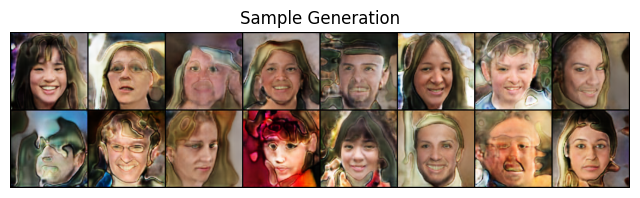

Epoch [4/24]


100%|██████████| 2188/2188 [26:33<00:00,  1.37it/s, alpha=0.333, crit_loss=-0.524, gen_loss=0.129, gp=0.0108]  


### Saving checkpoints ###


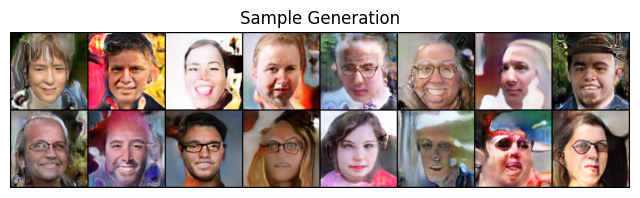

Epoch [5/24]


100%|██████████| 2188/2188 [26:33<00:00,  1.37it/s, alpha=0.417, crit_loss=-0.622, gen_loss=0.438, gp=0.0332]   


### Saving checkpoints ###


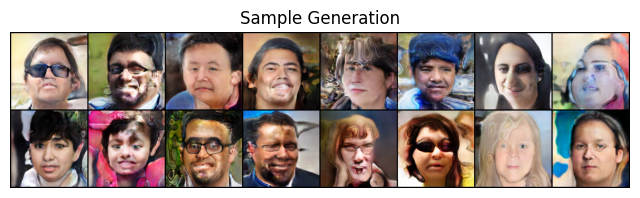

Epoch [6/24]


100%|██████████| 2188/2188 [25:11<00:00,  1.45it/s, alpha=0.5, crit_loss=-2.95, gen_loss=3.24, gp=0.017]        


### Saving checkpoints ###


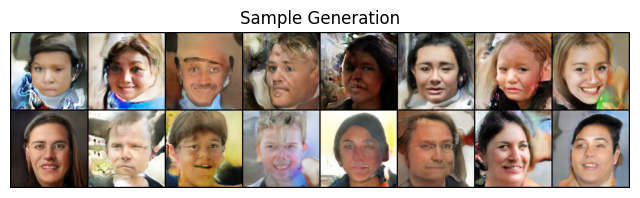

Epoch [7/24]


100%|██████████| 2188/2188 [25:36<00:00,  1.42it/s, alpha=0.583, crit_loss=-1.52, gen_loss=2.78, gp=0.0172]     


### Saving checkpoints ###


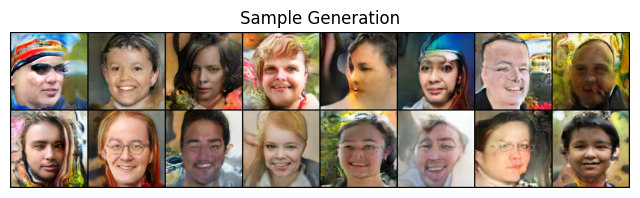

Epoch [8/24]


100%|██████████| 2188/2188 [26:37<00:00,  1.37it/s, alpha=0.667, crit_loss=-0.474, gen_loss=8.77, gp=0.00667]  


### Saving checkpoints ###


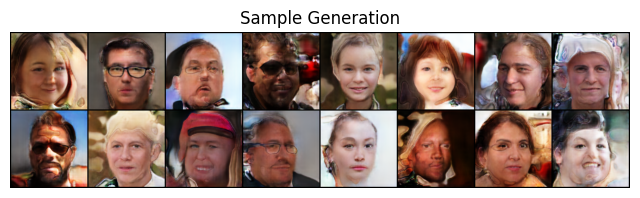

Epoch [9/24]


100%|██████████| 2188/2188 [26:35<00:00,  1.37it/s, alpha=0.75, crit_loss=-2.26, gen_loss=-0.178, gp=0.017]    


### Saving checkpoints ###


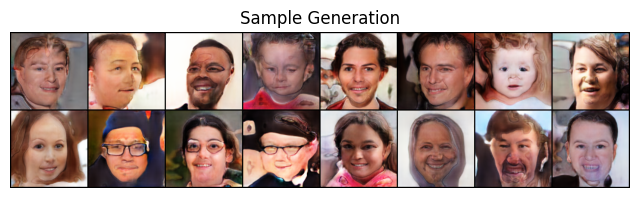

Epoch [10/24]


100%|██████████| 2188/2188 [26:05<00:00,  1.40it/s, alpha=0.833, crit_loss=-1.9, gen_loss=5.73, gp=0.0122]     


### Saving checkpoints ###


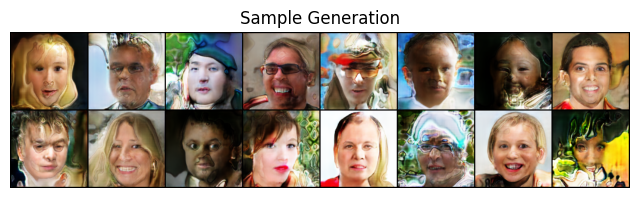

Epoch [11/24]


100%|██████████| 2188/2188 [24:43<00:00,  1.47it/s, alpha=0.917, crit_loss=-3.35, gen_loss=3.77, gp=0.0164]     


### Saving checkpoints ###


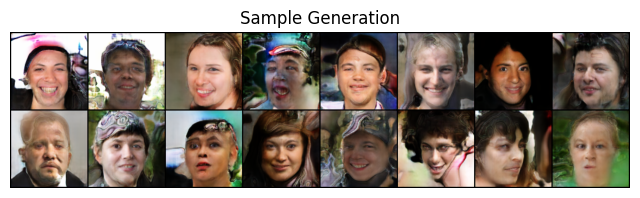

Epoch [12/24]


100%|██████████| 2188/2188 [24:52<00:00,  1.47it/s, alpha=1, crit_loss=-2.59, gen_loss=3.44, gp=0.0108]         


### Saving checkpoints ###


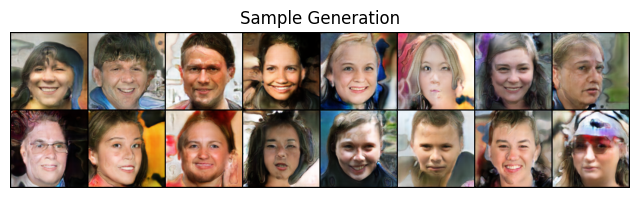

Epoch [13/24]


100%|██████████| 2188/2188 [26:35<00:00,  1.37it/s, alpha=1, crit_loss=-2.82, gen_loss=2.54, gp=0.0221]     


### Saving checkpoints ###


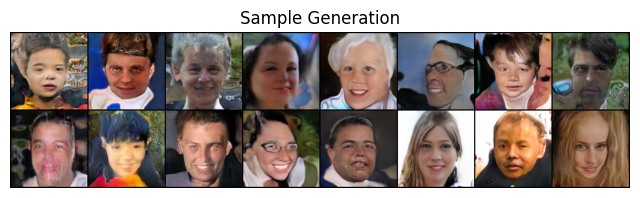

Epoch [14/24]


100%|██████████| 2188/2188 [26:37<00:00,  1.37it/s, alpha=1, crit_loss=-1.49, gen_loss=-0.396, gp=0.0158]    


### Saving checkpoints ###


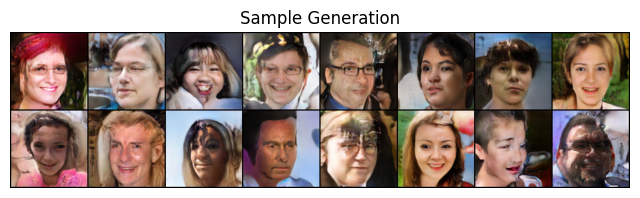

Epoch [15/24]


100%|██████████| 2188/2188 [26:21<00:00,  1.38it/s, alpha=1, crit_loss=-1.36, gen_loss=-3.3, gp=0.014]      


### Saving checkpoints ###


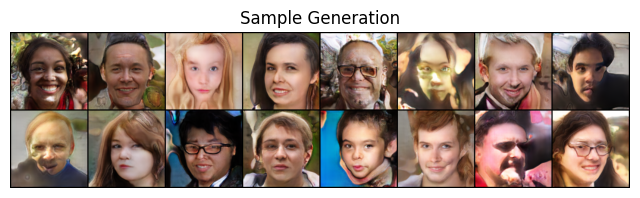

Epoch [16/24]


100%|██████████| 2188/2188 [24:48<00:00,  1.47it/s, alpha=1, crit_loss=-1.47, gen_loss=-1.39, gp=0.0132]   


### Saving checkpoints ###


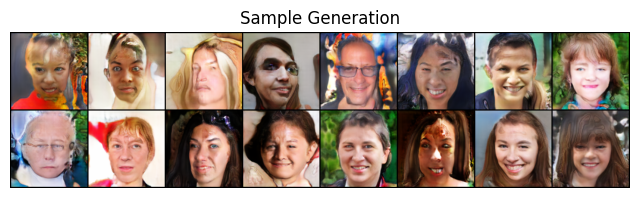

Epoch [17/24]


100%|██████████| 2188/2188 [24:47<00:00,  1.47it/s, alpha=1, crit_loss=-0.96, gen_loss=-2.85, gp=0.00681]   


### Saving checkpoints ###


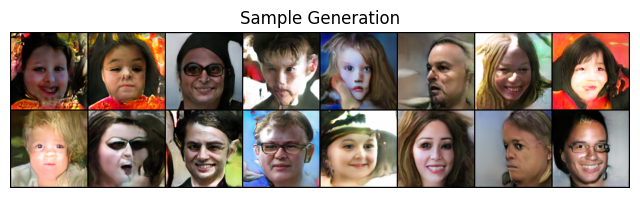

Epoch [18/24]


100%|██████████| 2188/2188 [24:46<00:00,  1.47it/s, alpha=1, crit_loss=0.252, gen_loss=-3.9, gp=0.00468]    


### Saving checkpoints ###


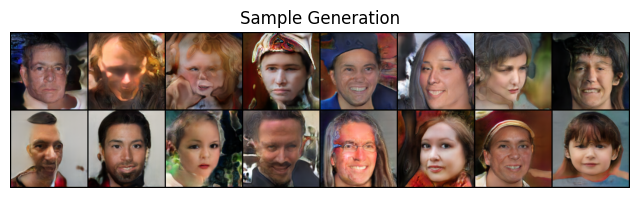

Epoch [19/24]


100%|██████████| 2188/2188 [24:48<00:00,  1.47it/s, alpha=1, crit_loss=-1.82, gen_loss=3.85, gp=0.011]     


### Saving checkpoints ###


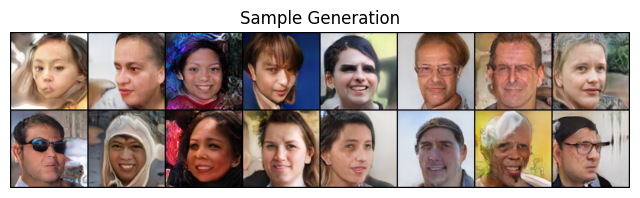

Epoch [20/24]


100%|██████████| 2188/2188 [24:48<00:00,  1.47it/s, alpha=1, crit_loss=-1.12, gen_loss=3.96, gp=0.00265]     


### Saving checkpoints ###


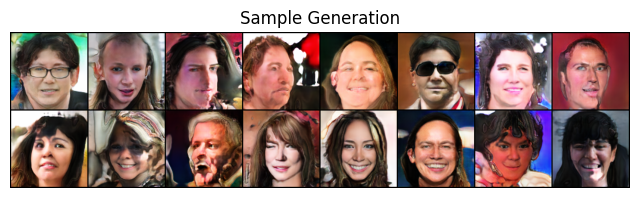

Epoch [21/24]


100%|██████████| 2188/2188 [24:47<00:00,  1.47it/s, alpha=1, crit_loss=-0.787, gen_loss=0.342, gp=0.00935]  


### Saving checkpoints ###


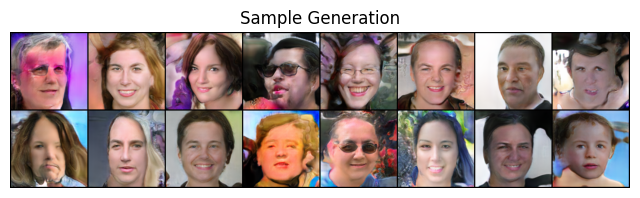

Epoch [22/24]


100%|██████████| 2188/2188 [24:48<00:00,  1.47it/s, alpha=1, crit_loss=-0.188, gen_loss=2.47, gp=0.00966]     


### Saving checkpoints ###


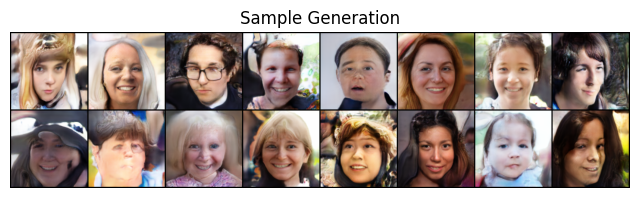

Epoch [23/24]


100%|██████████| 2188/2188 [24:47<00:00,  1.47it/s, alpha=1, crit_loss=-2.22, gen_loss=5.12, gp=0.011]     


### Saving checkpoints ###


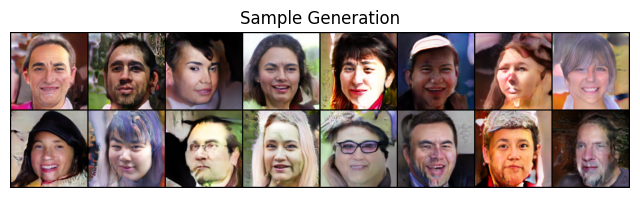

Epoch [24/24]


100%|██████████| 2188/2188 [24:48<00:00,  1.47it/s, alpha=1, crit_loss=-1.5, gen_loss=7.36, gp=0.00342]     


### Saving checkpoints ###


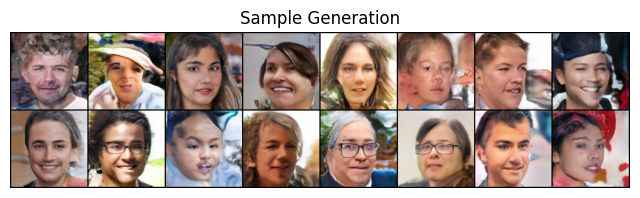

In [60]:
gen = Generator(Z_DIM, IN_CHANNELS, IMG_CHANNELS).to(DEVICE)
crit = Critic(IN_CHANNELS, IMG_CHANNELS).to(DEVICE)

gen_optim = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.99))
crit_optim = optim.Adam(crit.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.99))

gen_scalar = torch.cuda.amp.GradScaler()
crit_scalar = torch.cuda.amp.GradScaler()

if LOAD_MODEL:
    print("### Loading checkpoints ###")
    load_checkpoint(GEN_CHECKPOINT, gen, gen_optim, LEARNING_RATE)
    load_checkpoint(CRIT_CHECKPOINT, crit, crit_optim, LEARNING_RATE)

gen.train()
crit.train()

step = int(log2(START_IMG_SIZE / 4))

for epochs in PROG_EPOCHS[step:]:
    alpha = 0
    loader, dataset = get_loader(4 * 2 ** step)
    clear_output()
    print(f"\nImage size: {4 * 2 ** step}")

    for epoch in range(epochs):
        print(f"Epoch [{epoch + 1}/{epochs}]")

        loop = tqdm(loader, leave=True)
        for batch_idx, (real, _) in enumerate(loop):
            real = real.to(DEVICE)
            cur_batch_size = real.shape[0]

            # Train critic
            noise = torch.randn(cur_batch_size, Z_DIM, 1, 1).to(DEVICE)

            with torch.cuda.amp.autocast():
                fake = gen(noise, alpha, step)
                real_pred = crit(real, alpha, step)
                fake_pred = crit(fake.detach(), alpha, step)
                gp = gradient_penalty(crit, real, fake, alpha, step, DEVICE)
                crit_loss = -(torch.mean(real_pred) - torch.mean(fake_pred)) + LAMBDA_GP * gp + (0.001 * torch.mean(real_pred ** 2))

            crit_optim.zero_grad()
            crit_scalar.scale(crit_loss).backward()
            torch.nn.utils.clip_grad_norm_(crit.parameters(), MAX_GRAD_NORM)
            crit_scalar.step(crit_optim)
            crit_scalar.update()

            # Train generator
            with torch.cuda.amp.autocast():
                gen_fake = crit(fake, alpha, step)
                gen_loss = -torch.mean(gen_fake)

            gen_optim.zero_grad()
            gen_scalar.scale(gen_loss).backward()
            torch.nn.utils.clip_grad_norm_(gen.parameters(), MAX_GRAD_NORM)
            gen_scalar.step(gen_optim)
            gen_scalar.update()

            if alpha < 1:
                alpha += cur_batch_size / ((PROG_EPOCHS[step] * 0.5) * len(dataset))
                alpha = min(alpha, 1)

            loop.set_postfix(
                gp=gp.item(), 
                crit_loss=crit_loss.item(), 
                gen_loss=gen_loss.item(),
                alpha=alpha
            )

            
        if SAVE_MODEL:
            print("### Saving checkpoints ###")
            save_checkpoint(gen, gen_optim, filename=GEN_CHECKPOINT)
            save_checkpoint(crit, crit_optim, filename=CRIT_CHECKPOINT)

        plt.figure(figsize=(8, 8))
        plt.axis("off")
        plt.title("Sample Generation")
        plt.imshow(np.transpose(vutils.make_grid(fake.to(DEVICE)[:16], padding=2, normalize=True).cpu(), (1, 2, 0)))
        plt.show()

    step += 1